# Assignment 1

## Part 1: Temporal Patterns

**Excercise: Generate the visualizations described below**

**Weekly patterns. Basically, we'll forget about the yearly variation and just count up what happens during each weekday. [Here's what my version looks like.](https://raw.githubusercontent.com/suneman/socialdataanalysis2020/master/files/weekdays.png) Some things make sense - for example drunkenness and the weekend. But there are some aspects that were surprising to me. Check out prostitution and mid-week behavior, for example!?**

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import random 
import numpy as np
import seaborn as sns
import folium 
from folium import plugins
from folium.plugins import HeatMap

focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

# df = pd.read_csv('https://data.sfgov.org/api/views/tmnf-yvry/rows.csv')
df = pd.read_csv('Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv')
df.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,110308742,MISSING PERSON,FOUND PERSON,Friday,04/15/2011,16:00,TARAVAL,LOCATED,0 Block of CRESPI DR,-122.476328,37.719687,POINT (-122.476327815126 37.7196874952717),11030874275000
1,90316914,WARRANTS,WARRANT ARREST,Thursday,03/26/2009,12:28,SOUTHERN,"ARREST, BOOKED",1000 Block of MARKET ST,-122.411340,37.781271,POINT (-122.411339562557 37.7812707434494),9031691463010
2,130132311,SECONDARY CODES,DOMESTIC VIOLENCE,Friday,02/15/2013,02:00,PARK,"ARREST, BOOKED",CASTRO ST / MARKET ST,-122.435188,37.762670,POINT (-122.435187699349 37.7626702770872),13013231115200
3,80052833,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Tuesday,01/15/2008,20:13,MISSION,"ARREST, CITED",VALENCIA ST / 16TH ST,-122.421886,37.764918,POINT (-122.421886357981 37.7649178909424),8005283365016
4,70535770,SECONDARY CODES,DOMESTIC VIOLENCE,Saturday,05/26/2007,18:10,MISSION,"ARREST, BOOKED",2800 Block of FOLSOM ST,-122.413935,37.751693,POINT (-122.413935404044 37.7516932889916),7053577015200


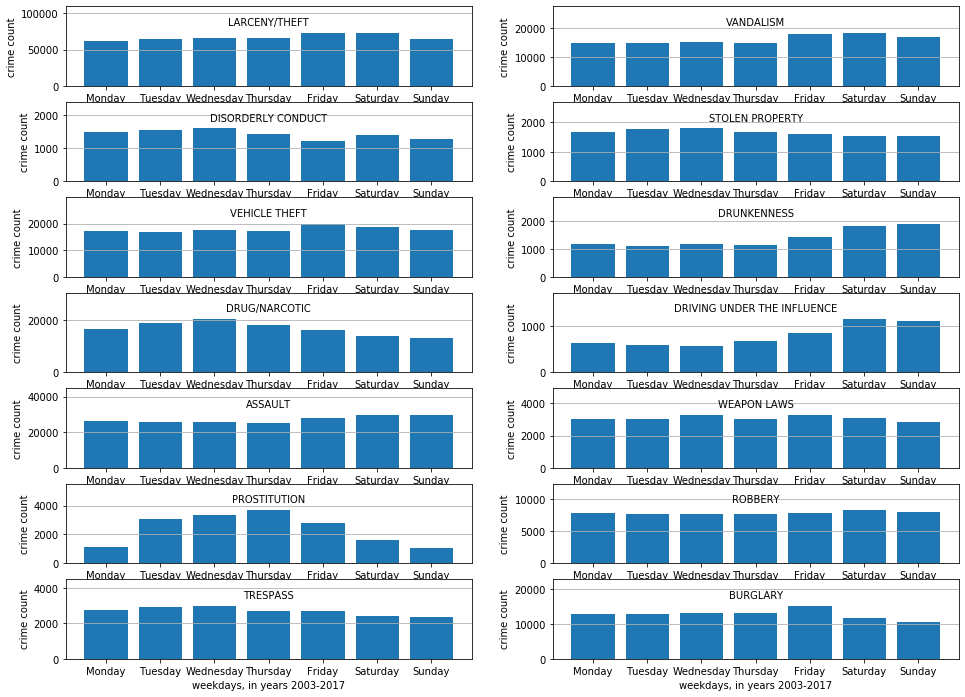

In [30]:
import matplotlib.pyplot as plt
import calendar 

weekday_order = list(calendar.day_name)

plt.figure(figsize=(16,12))

for crime in focuscrimes:
    weekday_count = {}
    
    for index, row in df[df['Category'] == crime].iterrows():   
        year = row['Date'].split('/')[2]
        weekday = row['DayOfWeek']
        if year != '2018':
            if weekday not in weekday_count.keys():
                weekday_count[weekday] = 1
            else:
                weekday_count[weekday] += 1
    
    # Sort weekdays from Mon-Sun
    sorted_weekdays = sorted(weekday_count.items(), key=lambda x: weekday_order.index(x[0]))
    ax = plt.subplot(7, 2, list(focuscrimes).index(crime)+1)
    plt.bar([x[0] for x in sorted_weekdays], [x[1] for x in sorted_weekdays])
    
    # Find max value on y-axis, to add some space for crime text
    max_y = max({(val) for (key, val) in weekday_count.items()})
    plt.ylim(0, max_y*1.5)
    plt.text(0.5, 0.8, crime, ha='center', va='center', transform=ax.transAxes)
    
    plt.grid(axis='y')
    plt.ylabel('crime count')
    plt.xlabel('weekdays, in years 2003-2017')

plt.show()

> Besides the expected distribution of drunkenness and driving under the influence in the weekends and the apparent prostitution mid-week peak, we also noticed the mid-week drug/narcotic peak. The two latter align nicely with the mid-week peak of disorderly conduct offenses.

> Most of the remaining distributions are rather even, hence no major trends show up.

**The months. We can also check if some months are worse by counting up number of crimes in Jan, Feb, ..., Dec. Did you see any surprises there?**

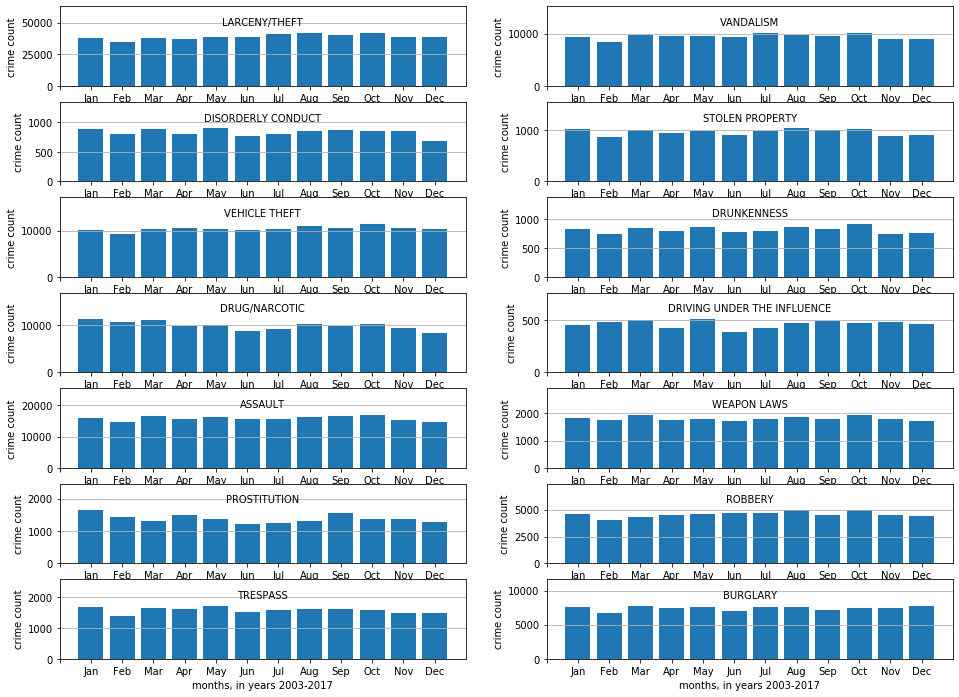

In [31]:
months=list(calendar.month_name)
plt.figure(figsize=(16,12))

for crime in focuscrimes:
    month_count = {}
    
    for index, row in df[df['Category'] == crime].iterrows():   
        year = row['Date'].split('/')[2]
        month = int(row['Date'][:2])
        if year != '2018':
            if month not in month_count.keys():
                month_count[month] = 1
            else:
                month_count[month] += 1
    
    sorted_months = sorted(month_count.items())
    ax = plt.subplot(7, 2, list(focuscrimes).index(crime)+1)
    plt.bar([x[0] for x in sorted_months], [x[1] for x in sorted_months])
    
    max_y = max({(val) for (key, val) in month_count.items()})
    plt.ylim(0, max_y*1.5)
    plt.text(0.5, 0.8, crime, ha='center', va='center', transform=ax.transAxes)
    
    plt.grid(axis='y')
    plt.xticks(range(0,13), [x[:3] for x in months])
    plt.ylabel('crime count')
    plt.xlabel('months, in years 2003-2017')

    
plt.show()

> We would have expected burglary to be much more distinct during December due to the christmas season, due to people leaving their homes. In fact December seems to hold the minimum overall crime count, when quickly glancing at the yearly distributions.

> February consists of fewer days and therefore might skew the plots slightly. We recognized that February does not stand out in any of the focus crimes, which we interpret as it being a regular month.

> In general, by looking at data grouped by months, interesting trends seem to average out.

**The 24 hour cycle. We'll can also forget about weekday and simply count up the number of each crime-type that occurs in the entire dataset from midnight to 1am, 1am - 2am ... and so on. Again: Give me a couple of comments on what you see.**

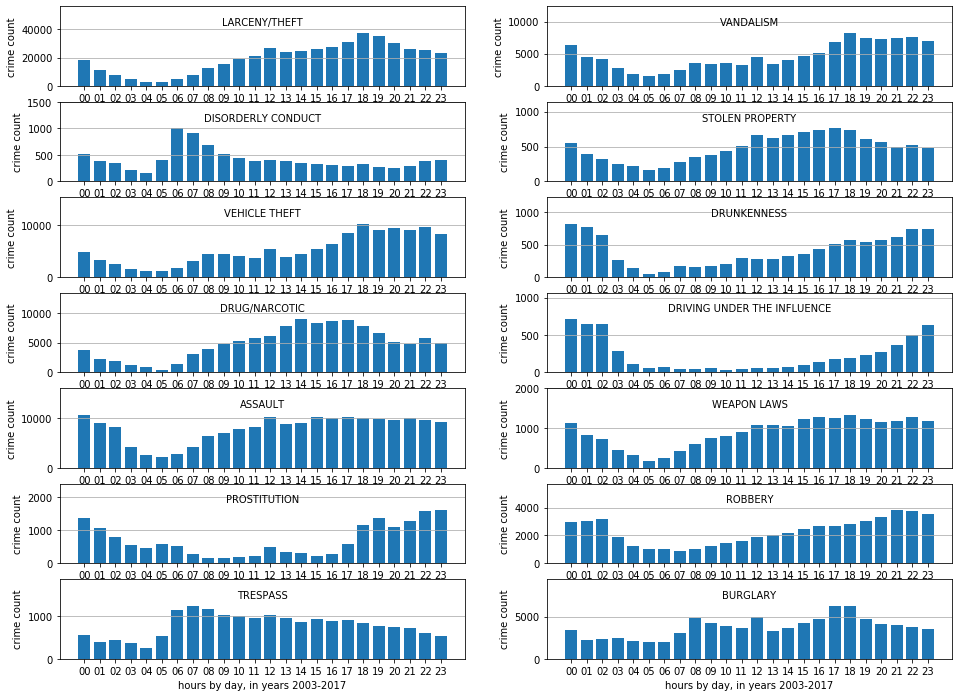

In [32]:
plt.figure(figsize=(16,12))

for crime in focuscrimes:
    hour_count = {}
    
    for index, row in df[df['Category'] == crime].iterrows():   
        year = row['Date'].split('/')[2]
        hour = row['Time'][:2]
        if year != '2018':
            if hour not in hour_count.keys():
                hour_count[hour] = 1
            else:
                hour_count[hour] += 1
    
    sorted_hours = sorted(hour_count.items())
    ax = plt.subplot(7, 2, list(focuscrimes).index(crime)+1)
    plt.bar([x[0] for x in sorted_hours], [x[1] for x in sorted_hours])
    
    max_y = max({(val) for (key, val) in hour_count.items()})
    plt.ylim(0, max_y*1.5)
    plt.text(0.5, 0.8, crime, ha='center', va='center', transform=ax.transAxes)
    
    plt.grid(axis='y')
    plt.ylabel('crime count')
    plt.xlabel('hours by day, in years 2003-2017')

plt.show()

> As opposed to monthly grouping of data, the daily distribution shows quite distinct differences in the crime count. Besides prostitution, the quiet hour is (as expected) in the night / early morning hours (04:00 - 05:00). On that note, Disorderly conduct peaks at 6 in the morning, which interestingly enough does not show any correlation with drunkenness as we would have expected.

> As we expected Robbery, Drunkenness, Driving under the influence, Assault and Prostitution all occur mostly during evening / night hours. 

> Vehicle theft seems to be peaking around lunch and dinner hours, where Prostitution also seems to deviate from the regular daily trend.

**Hours of the week. But by looking at just 24 hours, we may be missing some important trends that can be modulated by week-day, so let's also check out the 168 hours of the week. So let's see the number of each crime-type Monday night from midninght to 1am, Monday night from 1am-2am - all the way to Sunday night from 11pm to midnight.**

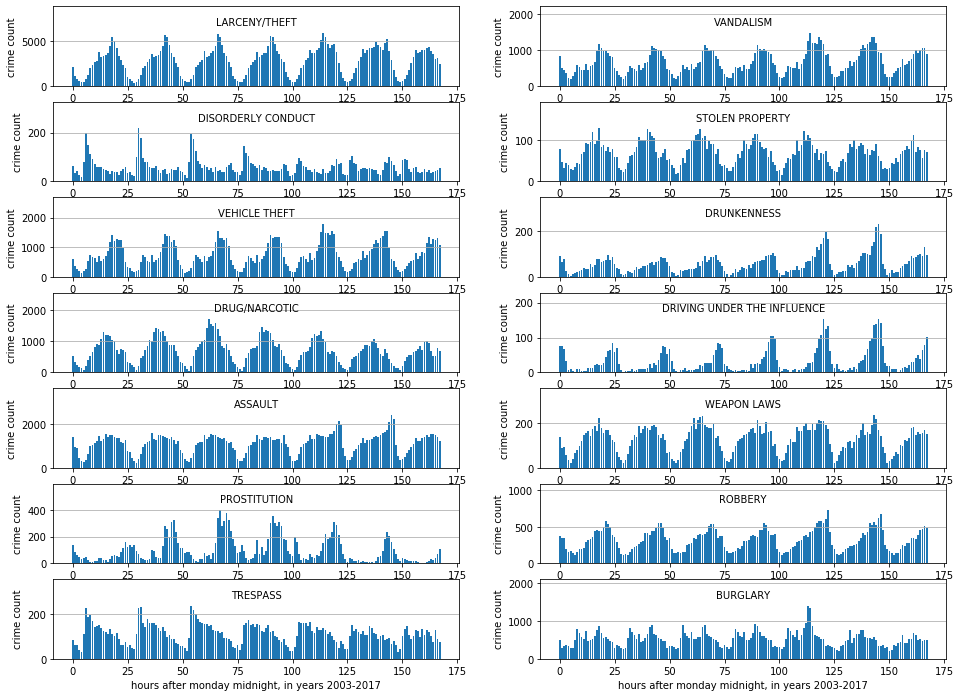

In [33]:
extra_hours = {"Monday": 0, "Tuesday": 24, "Wednesday": 24*2, "Thursday": 24*3, "Friday": 24*4, "Saturday": 24*5, "Sunday": 24*6}

plt.figure(figsize=(16,12))
for crime in focuscrimes:
    hour_count = {}
    
    for index, row in df[df['Category'] == crime].iterrows():   
        year = row['Date'].split('/')[2]
        weekday = row['DayOfWeek']
        hour = int(row['Time'][:2]) + extra_hours[weekday]
        
        if year != '2018':
            if hour not in hour_count.keys():
                hour_count[hour] = 1
            else:
                hour_count[hour] += 1
    
    sorted_hours = sorted(hour_count.items())
    ax = plt.subplot(7, 2, list(focuscrimes).index(crime)+1)
    plt.bar([x[0] for x in sorted_hours], [x[1] for x in sorted_hours])
    
    max_y = max({(val) for (key, val) in hour_count.items()})
    plt.ylim(0, max_y*1.5)
    plt.text(0.5, 0.8, crime, ha='center', va='center', transform=ax.transAxes)
    
    plt.grid(axis='y')
    plt.ylabel('crime count')
    plt.xlabel('hours after monday midnight, in years 2003-2017')

plt.show()

> Generally for the weekly trends, crimes tend to happen more during the weekend. The mid-week prostitution peak is clearly visible here.

> Burglary distinctly happens friday, and interestingly enough Disorderly Conduct peaks intensely during the early hours (as seen above), but mostly during first half of the week.

> Another general remark is that these plots show very nicely the daily distributions throughout the week and could be used to tell the time of day quite accurately, using for instance Larcency/theft weekly data.

## Part 2: Thinking about data and visualization

**What is the difference between data and metadata? How does that relate to the bike-example?**

> Metadata is data about the "data" we have. It is informative and descriptive about the data. In some way it is a dictionary to understand data we have. Data itself is a source waiting for to be evaluated and analyzed. In the bike example, at the first sight, there was a large file of full of text and number which has just some latitude and longitude values but in addition to that it contained much more different kind of data which were unmeaningfull at the first sight. So, this metadata is a way to store and explain what the data it contains. From the Metadata, data information such as latitude and longitude values are extracted and the graphs of "Altitude and Timestep" and "Way followed" are created.

**Sune says that the human eye is a great tool for data analysis. Do you agree? Explain why/why not. Mention something that the human eye is very good at. Can you think of something that is difficult for the human eye. Explain why your example is difficult.**

> We agree about the fact that human eye is a great tool for data analysis. Human eye is able to parse and quickly analyze meaningful statistics from the event it observes. Human eye can quickly analyze the punch or kick that comes towards it. And body tries to dodge it with reflexes. Comparing two different data sources is very diffucult for the eye. When we imagine a bunch of events occuring at some specific dates. It is very hard for eye to analyze that. Because it needs to be visualized to be compared or analyzed. At that point, data visualization tools are coming to our help. 

**Simpson's paradox is hard to explain. Come up with your own example - or find one on line.**

> [At the wikipedia page of Simpson's paradox](https://en.wikipedia.org/wiki/Simpson%27s_paradox) it is pretty easy explained at the example of batting. When the two professional baseball players are compared, player "A" had a higher average of batting at each two consecutive years than player "B". But player "B" had a higher average of batting across these two years (total number). This event yieleded this kind of a result because there were great differences in the number of at bats between the years. Therefore when the total ratio is examined, player "B" had better average of batting.

**In your own words, explain the difference between exploratory and explanatory data analysis.**

> From the etymological perspective of the words, exploratory analysis is about exploring patterns and explanatory analysis is about explaining facts about data. Exploratory analysis is a preleminary analysis which you try to understand your data, figure out what to ask and analyze from data, catch the clues to find correct patterns through your data analysis To understand more about data you can visualize what you have questions about. Explanatory analysis is the part where you evaluate your findings and results. At this step, you may visualize your observations as a result of your analysis or test your hypothesis.

**As mentioned earlier, visualization is not the only way to test for correlation. We can (for example) calculate the Pearson correlation. Explain in your own words how the Pearson correlation works and write down it's mathematical formulation. Can you think of an example where it fails (and visualization works)?**

> Formulation of Pearson correlation is as follows;
<img src="image.png">
> Pearson correlation is one of the measure to show the linear correlation between two variables. Covariance is a measure of the joint variability of two variables. Pearson correlataion is a measure which is created by dividing joint variability of variable by the multiply of the self variablity of variables. (It is actually standard deviation but when they are multiplied, they are again in the "measure" of variance.) Correlation as a number fails at nonlinear relationships but visualization works at nonlinear visualizations such as follows;
<img src="image2.png">
In the figures above, pearson correlation is zero but from the visual aspect we can comment much more about correlation regarding the insight of data.

**What is the difference between a bar-chart and a histogram?**

> Histogram depicts the frequency of each data points however bar graph is just a direct representation of data in bars. In bar chart, length of bars is a way to differentiate between data points such as 5 kg. of coffee or 6 kg. of coffee per person per country is consumed. In the histogram, number of countries who has consumed 5 kg. of coffee or 6 kg. of coffee is counted and graphed. We can't follow the trends on a bar-chart and we can't visualize all of long data set in a bar-chart like in coffee example.

**I mention in the video that it's important to choose the right bin-size in histograms. But how do you do that? Do a Google search to find a criterion you like and explain it.**

> As it is mentioned in DOAST;  If we make the bin-size too large, then we lose too much detailed information about the data set. If we make it too small and we will have few or no events in most of the bins, and the shape of the distribution does not become apparent. And there isn't simple rule of thumb that can predict a good bin-size for a given data set.
> One of the criterion we can discuss is Scott’s rule. Bin width is;
<img src="image3.png">
> where σ is the standard deviation for the entire data set and n is the number of points and h is the bin-width. This rule assumes that the data follows a Gaussian (Normal) distribution; otherwise, it is likely to give a bin width that is too wide. It minimizes the integrated mean squared error of the density estimate.

## Part 3: Generating important plot types

**Excercise: Let us recreate some plots from DAOST but using our own favorite dataset.**

**First, let's make a jitter-plot (that is, code up something like Figure 2-1 from DAOST from scratch), but based on SF Police data. My hunch from inspecting the file is that the police-folks might be a little bit lazy in noting down the exact time down to the second. So choose a crime-type and a suitable time interval (somewhere between a month and 6 months depending on the crime-type) and create a jitter plot of the arrest times during a single hour (like 13-14, for example). So let time run on the $x$-axis and create vertical jitter.**

In [34]:
# choose crime type
df1 = df[df['Category'] == 'ASSAULT']
# choose time interval
df1['Date'] = pd.to_datetime(df1['Date'])
start_date = pd.to_datetime('01-01-2017')
end_date = pd.to_datetime('30-06-2017')
mask = (df1['Date'] >= start_date) & (df1['Date'] <= end_date)
df1 = df1.loc[mask]
df1.head()

C:\Users\han\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
856299,170136533,ASSAULT,CHILD ABUSE (PHYSICAL),Friday,2017-02-17,09:58,BAYVIEW,"ARREST, BOOKED",300 Block of WILLIAMS AV,-122.399444,37.730176,POINT (-122.39944365894239 37.73017601616475),17013653315015
856436,170090230,ASSAULT,INFLICT INJURY ON COHABITEE,Wednesday,2017-02-01,16:30,INGLESIDE,"ARREST, BOOKED",100 Block of DUBLIN ST,-122.426933,37.717736,POINT (-122.4269330155777 37.717735788495894),17009023015040
856486,170143146,ASSAULT,BATTERY,Sunday,2017-02-19,12:45,BAYVIEW,"ARREST, BOOKED",16TH ST / DEHARO ST,-122.401724,37.766132,POINT (-122.40172369651208 37.76613217314354),17014314604134
856535,170098240,ASSAULT,BATTERY,Saturday,2017-02-04,07:40,MISSION,"ARREST, BOOKED",24TH ST / MISSION ST,-122.418448,37.752239,POINT (-122.41844818610124 37.75223916526247),17009824004134
856573,170144912,ASSAULT,INFLICT INJURY ON COHABITEE,Monday,2017-02-20,02:45,TENDERLOIN,"ARREST, BOOKED",100 Block of JONES ST,-122.412250,37.782556,POINT (-122.41224976763395 37.782556330201984),17014491215040


In [119]:
# define time interval for the jitter plot
mask2 = mask = (df1['Time'] >= '13:00') & (df1['Time'] <= '14:00')
df1 = df1.loc[mask2]
df1 = df1.sort_values(by=['Time'])
df1.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
1190008,170464942,ASSAULT,FALSE IMPRISONMENT,Tuesday,2017-06-06,13:00,BAYVIEW,NONE,100 Block of KISKA RD,-122.375989,37.730158,POINT (-122.37598915809185 37.7301576924252),17046494204170
1010538,170359876,ASSAULT,THREATS AGAINST LIFE,Saturday,2017-04-29,13:00,INGLESIDE,NONE,2600 Block of BAY SHORE BL,-122.405386,37.708647,POINT (-122.4053857359687 37.70864735523271),17035987619057
1216535,170449621,ASSAULT,INFLICT INJURY ON COHABITEE,Thursday,2017-06-01,13:00,SOUTHERN,NONE,0 Block of 3RD ST,-122.402836,37.786801,POINT (-122.40283552814216 37.78680090283844),17044962115040
990044,170048524,ASSAULT,BATTERY,Wednesday,2017-01-18,13:00,NORTHERN,NONE,800 Block of OFARRELL ST,-122.418751,37.785116,POINT (-122.41875125282944 37.78511600494293),17004852404134
1084039,170186958,ASSAULT,BATTERY,Monday,2017-03-06,13:00,SOUTHERN,NONE,300 Block of 7TH ST,-122.406744,37.775949,POINT (-122.40674378313723 37.77594881724181),17018695804134


In [36]:
# create random points for the jitter plot
rows, columns = df1.shape
rand_int = []
for i in range(rows):
    rand_int.append(random.randint(0, 100))

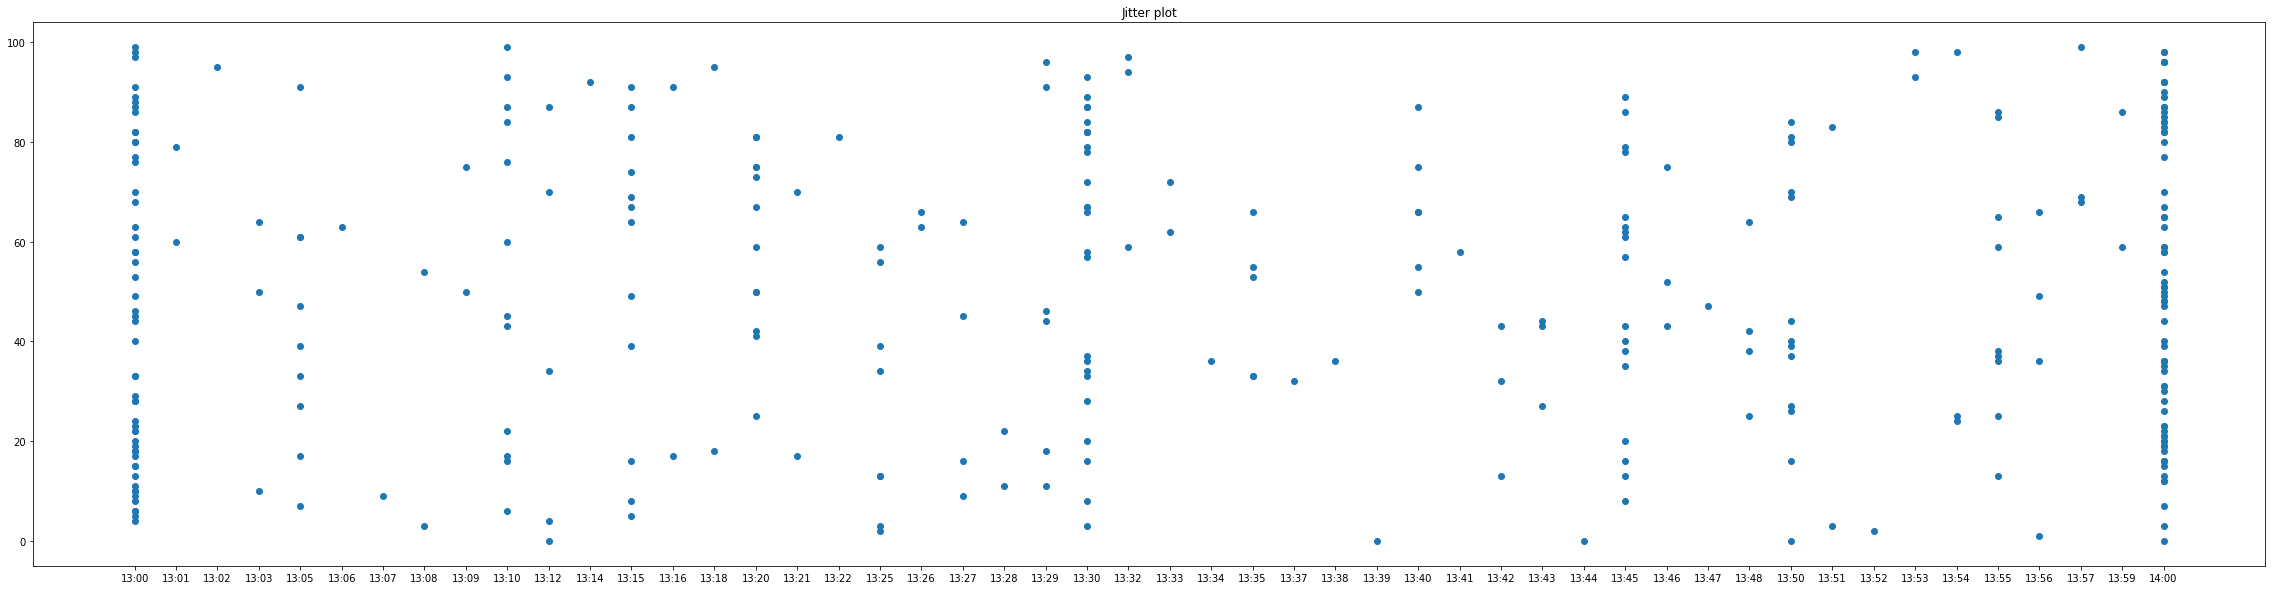

In [37]:
# jitter plot
plt.figure(figsize = (40, 10))
plt.scatter(df1['Time'], rand_int)
plt.title('Jitter plot')
plt.show()

**Now for some histograms (please create a crime-data based versions of the plot-type shown in DAOST Figure 2-2). (I think the GPS data could be fun to understand from this perspective.)**

**This time, pick two crime-types with different geographical patterns and a suitable time-interval for each (you want between 1000 and 10000 points in your histogram)**

In [118]:
# take assault category and filter for a date interval
df2 = df[df['Category'] == 'ASSAULT']
df2['Date'] = pd.to_datetime(df2['Date'])
start_date = pd.to_datetime('01-01-2017')
end_date = pd.to_datetime('30-06-2017')
mask = (df2['Date'] >= start_date) & (df2['Date'] <= end_date)
df2 = df2.loc[mask]
df2.head()

C:\Users\han\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
856299,170136533,ASSAULT,CHILD ABUSE (PHYSICAL),Friday,2017-02-17,09:58,BAYVIEW,"ARREST, BOOKED",300 Block of WILLIAMS AV,-122.399444,37.730176,POINT (-122.39944365894239 37.73017601616475),17013653315015
856436,170090230,ASSAULT,INFLICT INJURY ON COHABITEE,Wednesday,2017-02-01,16:30,INGLESIDE,"ARREST, BOOKED",100 Block of DUBLIN ST,-122.426933,37.717736,POINT (-122.4269330155777 37.717735788495894),17009023015040
856486,170143146,ASSAULT,BATTERY,Sunday,2017-02-19,12:45,BAYVIEW,"ARREST, BOOKED",16TH ST / DEHARO ST,-122.401724,37.766132,POINT (-122.40172369651208 37.76613217314354),17014314604134
856535,170098240,ASSAULT,BATTERY,Saturday,2017-02-04,07:40,MISSION,"ARREST, BOOKED",24TH ST / MISSION ST,-122.418448,37.752239,POINT (-122.41844818610124 37.75223916526247),17009824004134
856573,170144912,ASSAULT,INFLICT INJURY ON COHABITEE,Monday,2017-02-20,02:45,TENDERLOIN,"ARREST, BOOKED",100 Block of JONES ST,-122.412250,37.782556,POINT (-122.41224976763395 37.782556330201984),17014491215040


In [39]:
# take latitude and convert it to list
lat2 = df2['Y']
lat2 = lat2.values.tolist()

In [40]:
# take drug/narcotic category and filter for a date interval
df3 = df[df['Category'] == 'DRUG/NARCOTIC']
df3['Date'] = pd.to_datetime(df3['Date'])
start_date = pd.to_datetime('01-01-2017')
end_date = pd.to_datetime('30-06-2017')
mask = (df3['Date'] >= start_date) & (df3['Date'] <= end_date)
df3 = df3.loc[mask]
df3.head()

C:\Users\han\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
856388,179000458,DRUG/NARCOTIC,POSSESSION OF NARCOTICS PARAPHERNALIA,Saturday,2017-01-28,20:42,TARAVAL,"ARREST, BOOKED",1600 Block of HOLLOWAY AV,-122.478278,37.720945,POINT (-122.47827820633243 37.72094516162954),17900045816710
856619,170283786,DRUG/NARCOTIC,POSSESSION OF NARCOTICS PARAPHERNALIA,Friday,2017-04-07,02:59,BAYVIEW,"ARREST, BOOKED",3RD ST / PALOU AV,-122.390972,37.734015,POINT (-122.39097173455052 37.73401521807227),17028378616710
856875,170100033,DRUG/NARCOTIC,POSSESSION OF MARIJUANA,Saturday,2017-02-04,19:08,TENDERLOIN,"ARREST, BOOKED",HYDE ST / GOLDEN GATE AV,-122.415508,37.781654,POINT (-122.41550824278183 37.78165428060756),17010003316010
856899,170109790,DRUG/NARCOTIC,POSSESSION OF NARCOTICS PARAPHERNALIA,Wednesday,2017-02-08,11:00,NORTHERN,"ARREST, BOOKED",2300 Block of VANNESS AV,-122.423531,37.797185,POINT (-122.4235305474751 37.797185409335235),17010979016710
856901,170062762,DRUG/NARCOTIC,POSSESSION OF METH-AMPHETAMINE,Monday,2017-01-23,14:25,SOUTHERN,"ARREST, BOOKED",500 Block of MINNA ST,-122.408771,37.780136,POINT (-122.40877066526002 37.78013570117457),17006276216650


In [41]:
# take latitude and convert it to list
lat3 = df3['Y']
lat3 = lat3.values.tolist()

**Then take the latitude part of the GPS coordinates for each crime and bin the latitudes so that you have around 50 bins across the city of SF. You can use your favorite method for binning. I like numpy.histogram. This function gives you the counts and then you do your own plotting.**

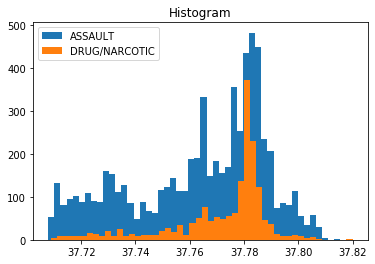

In [42]:
# bin the lists and create histograms
hist2 ,bins2 = np.histogram(lat2, bins = 50) 
hist3 ,bins3 = np.histogram(lat3, bins = 50) 
plt.hist(lat2, bins2, label='ASSAULT') 
plt.title("Histogram") 
plt.hist(lat3, bins3, label='DRUG/NARCOTIC') 
plt.legend()
plt.show()

**Next up is using the plot-type shown in Figure 2-4 from DAOST, but with the data you used to create Figure 2.1. To create the kernel density plot, you can either use gaussian_kde from scipy.stats (for an example, check out this stackoverflow post) or you can use seaborn.kdeplot.**

In [43]:
# take lacency/theft category and filter for date interval
df3 = df[df['Category'] == 'LARCENY/THEFT']
df3['Date'] = pd.to_datetime(df3['Date'])
start_date = pd.to_datetime('01-01-2017')
end_date = pd.to_datetime('30-06-2017')
mask = (df3['Date'] >= start_date) & (df3['Date'] <= end_date)
df3 = df3.loc[mask]
df3.head()

C:\Users\han\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
856220,179001149,LARCENY/THEFT,EMBEZZLEMENT FROM DEPENDENT OR ELDER ADULT BY ...,Thursday,2017-02-02,10:55,PARK,NONE,100 Block of CROWN TR,-122.447004,37.757590,POINT (-122.44700441217063 37.75758977237597),17900114906381
856223,176018591,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,2017-01-20,14:00,CENTRAL,NONE,NORTHPOINT ST / LEAVENWORTH ST,-122.418721,37.805931,POINT (-122.41872081930302 37.805931388229446),17601859106244
856240,179002244,LARCENY/THEFT,PETTY THEFT FROM LOCKED AUTO,Sunday,2017-03-12,20:00,TARAVAL,NONE,400 Block of CRESTLAKE DR,-122.489421,37.735238,POINT (-122.489420510786 37.73523757679138),17900224406242
856273,176035391,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,2017-02-08,03:30,NORTHERN,NONE,FRANKLIN ST / STARRKING WY,-122.422841,37.784546,POINT (-122.42284079465297 37.78454553552158),17603539106244
856286,170102750,LARCENY/THEFT,THEFT OF COMPUTERS OR CELL PHONES,Saturday,2017-02-04,17:35,INGLESIDE,NONE,300 Block of MOSCOW ST,-122.427127,37.722055,POINT (-122.42712709214925 37.722054694694684),17010275006126


In [44]:
# convert time to time percentage 
numberhour = []
df3['NewTime'] =  df3['Time'].str.split(':')
for i, row in df3['Time'].iteritems():
    hour = row[0]
    percentage = round((int(row[1]) * 100) / 60)
    finalh = hour + '.' + str(percentage)
    finalh = float(finalh)
    numberhour.append(finalh)
    
df3['NewTime'] = numberhour

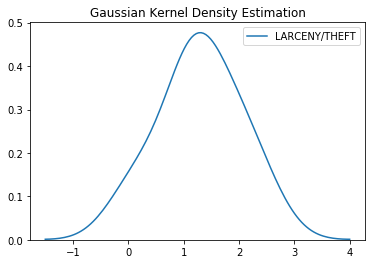

In [45]:
# gaussian KDE with seaborn 
sns.kdeplot(df3['NewTime'], bw=0.5, label = 'LARCENY/THEFT')
plt.title('Gaussian Kernel Density Estimation')
plt.show()

**Finally, grab 25 random timepoints from the dataset (of 1000-10000 original data) you've just plotted and create a version of Figure 2-4 based on the 25 data points. Does this shed light on why I think KDEs can bee misleading?**

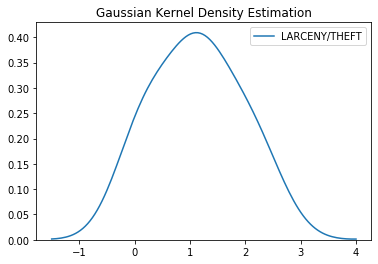

In [46]:
# take 25 random samples and create the plot again 
df4 = df3.sample(n = 25, random_state = 1)
sns.kdeplot(df4['NewTime'], bw=0.5, label = 'LARCENY/THEFT')
plt.title('Gaussian Kernel Density Estimation')
plt.show()

> Even if the data size has been lessened significantly, both of the plots seem quite same. Therefore we can better understand why KDEs can be misleading. Because even if the data size is much less, the interpretation of the plots are similiar.

## Part 4: Heatmaps of geo-data

**Exercise: A new take on geospatial data using Folium. Now we look at studying geospatial data by plotting raw data points as well as heatmaps on top of actual maps.**

**First start by plotting a map of San Francisco with a nice tight zoom. Simply use the command folium.Map([lat, lon], zoom_start=13), where you'll have to look up San Francisco's longitude and latitude.**

In [116]:
map_hooray = folium.Map(location=[37.77, -122.4], zoom_start = 13)
map_hooray

**Next, use the the coordinates for SF City Hall 37.77919, -122.41914 to indicate its location on the map with a nice, pop-up enabled maker. (In the screenshot below, I used the black & white Stamen tiles, because they look cool).**

In [117]:
folium.Marker([37.77919, -122.41914],
              popup='SF City Hall',
              icon=folium.Icon(color='blue')
             ).add_to(map_hooray)
map_hooray

**Now, let's plot some more data (no need for popups this time). Select a couple of months of data for 'DRUG/NARCOTIC' and draw a little dot for each arrest for those two months. You could, for example, choose June-July 2016, but you can choose anything you like - the main concern is to not have too many points as this uses a lot of memory and makes Folium behave non-optimally. We can call this a kind of visualization a point scatter plot.**

In [49]:
# find the crimes from DRUG/NARCOTIC for the first semester of 2017
df5 = df[df['Category'] == 'DRUG/NARCOTIC']
df5['Date'] = pd.to_datetime(df5['Date'])
start_date = pd.to_datetime('01-06-2017')
end_date = pd.to_datetime('03-06-2017')
mask = (df5['Date'] >= start_date) & (df5['Date'] <= end_date)
df5 = df5.loc[mask]

C:\Users\han\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [65]:
for index, row in df5.iterrows():
    folium.CircleMarker([row['Y'], row['X']],
              radius = 1,
              popup= row['Descript'],
              #icon=folium.Icon(color='red')
              color = 'red'
             ).add_to(map_hooray)
map_hooray

**Next, let's play with heatmaps. You can figure out the appropriate commands by grabbing code from the main tutorial) and modifying to suit your needs. To create your first heatmap, grab all arrests for the category 'SEX OFFENSES, NON FORCIBLE' across all time. Play with parameters to get plots you like.**

In [66]:
# dataframe with the category SEX OFFENSES, NON FORCIBLE
df6 = df[df['Category'] == 'SEX OFFENSES, NON FORCIBLE']
map_hooray2 = folium.Map(location=[37.77, -122.4], zoom_start = 15, tiles='Stamen Toner')
heat_data = [[row['Y'],row['X']] for index, row in df6.iterrows()]
HeatMap(heat_data).add_to(map_hooray2)
map_hooray2

**Now, comment on the differences between scatter plots and heatmaps.**

- What can you see using the scatter-plots that you can't see using the heatmaps?

> We can observe that for clearly separation scatter plot is better to understand the region. You can detect outlier dots or less frequent dots at the same importance level of other dots. Therefore it doesn't misguide you in terms of emergence of an event.

- And vice versa: what does the heatmaps help you see that's difficult to distinguish in the scatter-plots?

> Heat-maps is a way to visualize the number of occurences in form of colors. But in the scatter-plots we can't understand how dense a point when compared with other point in the scatter plot since they overlap. As an overall view of the region, heat-maps are quite helpful.

**Play around with the various parameter for heatmaps.**

In [86]:
map_hooray3 = folium.Map(location=[37.77, -122.4], zoom_start = 15, tiles='Stamen Toner')
HeatMap(heat_data, radius = 30, max_zoom = 30, blur=10).add_to(map_hooray3)
map_hooray3

**Comment on the effect on the various parameters for the heatmaps. How do they change the picture? (at least talk about the radius and max_zoom). For one combination of settings, my heatmap plot looks like this.**

> When the radius is incremented, since the events overlap more of each other, map is getting more red or reddish. "max_zoom" is about the intensity levels of events. Therefore when it is decreased each event is more intense and map gets red again. "blur" signify the amount of blur of the events. When it is incremented event representation of colors on the map becomes more blurry.

**In that screenshot, I've (manually) highlighted a specific hotspot for this type of crime. Use your detective skills to find out what's going on in that building on the 800 block of Bryant street ... and explain in your own words.**

> Hall of Justice seemed to be hotspot for sex offences. But it is very unlikely to happen these kind of offences near that area. It is more likely a type of incorrect data input.

**Exercise: Heat map movies. This exercise is a bit more independent than above - you get to make all the choices. Start by choosing your favorite crimetype. Prefereably one with spatial patterns that change over time (use your data-exploration from the previous lectures to choose a good one).**

In [53]:
# we will use data for DRUG/NARCOTIC category 
df7 = df[df['Category'] == 'DRUG/NARCOTIC']

**Now, choose a time-resolution. You could plot daily, weekly, monthly datasets to plot in your movie. Again the goal is to find interesting temporal patterns to display. We want at least 20 frames though.**

In [54]:
# data for June 2017 
df7['Date'] = pd.to_datetime(df['Date'])
start_date = pd.to_datetime('01-06-2017')
end_date = pd.to_datetime('30-06-2017')
mask = (df7['Date'] >= start_date) & (df7['Date'] <= end_date)
df7 = df7.loc[mask]
df7 = df7.sort_values(by=['Date', 'Time'], ascending=True)
df7.head()

C:\Users\han\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
1117935,180014032,DRUG/NARCOTIC,POSSESSION OF NARCOTICS PARAPHERNALIA,Friday,2017-01-06,01:07,RICHMOND,"ARREST, BOOKED",34TH AV / CLEMENT ST,-122.494521,37.781575,POINT (-122.49452110947227 37.781574671889594),18001403216710
1118116,180014032,DRUG/NARCOTIC,POSSESSION OF METH-AMPHETAMINE,Friday,2017-01-06,01:07,RICHMOND,"ARREST, BOOKED",34TH AV / CLEMENT ST,-122.494521,37.781575,POINT (-122.49452110947227 37.781574671889594),18001403216650
1039545,170014923,DRUG/NARCOTIC,POSSESSION OF NARCOTICS PARAPHERNALIA,Friday,2017-01-06,10:30,TENDERLOIN,"ARREST, BOOKED",100 Block of MASON ST,-122.409473,37.784816,POINT (-122.40947349731987 37.78481636510202),17001492316710
1114802,170014923,DRUG/NARCOTIC,POSSESSION OF COCAINE,Friday,2017-01-06,10:30,TENDERLOIN,"ARREST, BOOKED",100 Block of MASON ST,-122.409473,37.784816,POINT (-122.40947349731987 37.78481636510202),17001492316620
1180146,170015119,DRUG/NARCOTIC,POSSESSION OF MARIJUANA,Friday,2017-01-06,11:40,MISSION,JUVENILE BOOKED,500 Block of DOLORES ST,-122.426037,37.759420,POINT (-122.4260365665262 37.759419804663),17001511916010


In [55]:
heat_data2 = []
for i in range(1, 31):
    per_day = []
    if len(str(i)) == 1:
        date =  pd.to_datetime('0' + str(i) + '-06-2017')
    else: 
        date = pd.to_datetime(str(i) + '-06-2017')
        
    mask = df7['Date'] == date
    df8 = df7.loc[mask]
    for index, row in df8.iterrows():
        per_day.append([row['Y'],row['X']])
    heat_data2.append(per_day)

**Create the movie using HeatMapWithTime.**

In [114]:
map_hooray4 = folium.Map(location=[37.77, -122.4], zoom_start = 11, tiles='Stamen Toner')
hm = plugins.HeatMapWithTime(heat_data2,auto_play=True,max_opacity=0.8)
hm.add_to(map_hooray4)
map_hooray4

**Comment on your results:**

- What patterns does your movie reveal?

> During the June 2107, especially at the "Howard Street", "Folson Street", "Golden Gate Avenue" and "Van Ness Avenue", it is more likely to happen of the event of DRUG / NARCOTIC. As we can see in HeatMap with time series data, there are some days in June that no incidents relevant to drugs were recorded. This is interesting as well. There might be some kind of agreements or delay in the supply chain processes of drug dealers. Or it can be just police's fault to not being able to detect people in crime.

- Motivate/explain the reasoning behind your choice of crimetype and time-resolution.

> DRUG / NARCOTIC is our own example of human noise in the data. Since number of occurences increases in the midday around 12:00. Instead according to common sense, it should be around 00:00. This is probably a human error of inserting wrong timestamp. And it is so strange to commit this crime in mid-week more often. There should be a mistake as well. Because again according to common sense, it is more probable to happen in weekend. The topic itself is very interesting as well. For the time frame selected, 2017 is the last year and June is the month that most of the people goes for vacation and the one of the month that drug event is least occured.

## Part 5: Errors in the data. The importance of looking at raw (or close to raw) data

**We started the course by plotting simple histogram plots that showed a lot of cool patterns. But sometimes the binning can hide imprecision, irregularity, and simple errors in the data that could be misleading. In the work we've done so far, we've already come across at least three examples of this in the SF data.**

- In the hourly activity for PROSTITUTION something surprising is going on on Wednesday. Remind yourself here, where I've highlighted the phenomenon I'm talking about.
- When we investigated the details of how the timestamps are recorded using jitter-plots, we saw that many more crimes were recorded e.g. on the hour, 15 minutes past the hour, and to a lesser in whole increments of 10 minutes. Crimes didn't appear to be recorded as frequently in between those round numbers. Remind yourself here, where I've highlighted the phenomenon I'm talking about.
- And finally, today we saw that the Hall of Justice seemed to be an unlikely hotspot for sex offences. Remind yourself here.

**Exercise: Data errors. The data errors we discovered above become invisible when we aggregate data. When we calculate mean values, statistics more generally. And when we visualize, they become difficult to notice when when we bin the data. We explore this process in the exercise below.**

**In each of the three examples above, describe in your own words how could the data-errors I call attention to above can biased the binned versions of the data and also briefly mention how it could create errors in how we understand what's going on in San Francisco and our modeling.**

> Example 1: Prostitution incidents seem to explode on Wednesday midday which is very suprising. In this case someone has done a mistake and instead of recording the crime in 12 midnight, s/he typed 12 midday.

> Example 2: Police officers do not record the exact time crimes happen and instead they record "round" hours like 15:00, 15:30, 16:00 etc. Therefore exact timestamps aren't available for this type of events.

> Example 3: The police officers who recorded the data misguided us. When we use our logic, it is impossible to commit a crime at the near of Hall of Justice.

> As in our example of drug crimes, there are some days in June that no incidents relevant to drugs were recorded. San Francisco is an area with high level of crimes relevant to drugs and narcotic so this fact seems a little weird. So, this noise might be due to the fact that during summer some officers are on leave for vacation, so the less number of employees in the police departments affects the crime records. Other errors might be related to scheduling of police department in terms of being at the right place at the right time regarding the detection of crime. (Or maybe people in town are on vacation, therefore demand decreases.)